# Reading DF

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

df = pd.read_csv(r'/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

Drop Un-necessery Columns

In [5]:
df.drop(['CustomerId','RowNumber'],axis=1,inplace=True)

In [6]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include=np.number).columns
categorical_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [8]:
numerical_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Check of Consistency

In [9]:
for col in categorical_columns:
    print(f'{col} has unique values = {len(df[col].unique())}')
    print(df[col].unique())
    print(f'------------------------------------------------------')

Surname has unique values = 2932
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
------------------------------------------------------
Geography has unique values = 3
['France' 'Spain' 'Germany']
------------------------------------------------------
Gender has unique values = 2
['Female' 'Male']
------------------------------------------------------


Drop Surname column as it contains alot of unique values

In [10]:
df.drop('Surname',axis=1,inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Check for Nulls

In [12]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Check for Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Check for Outliers

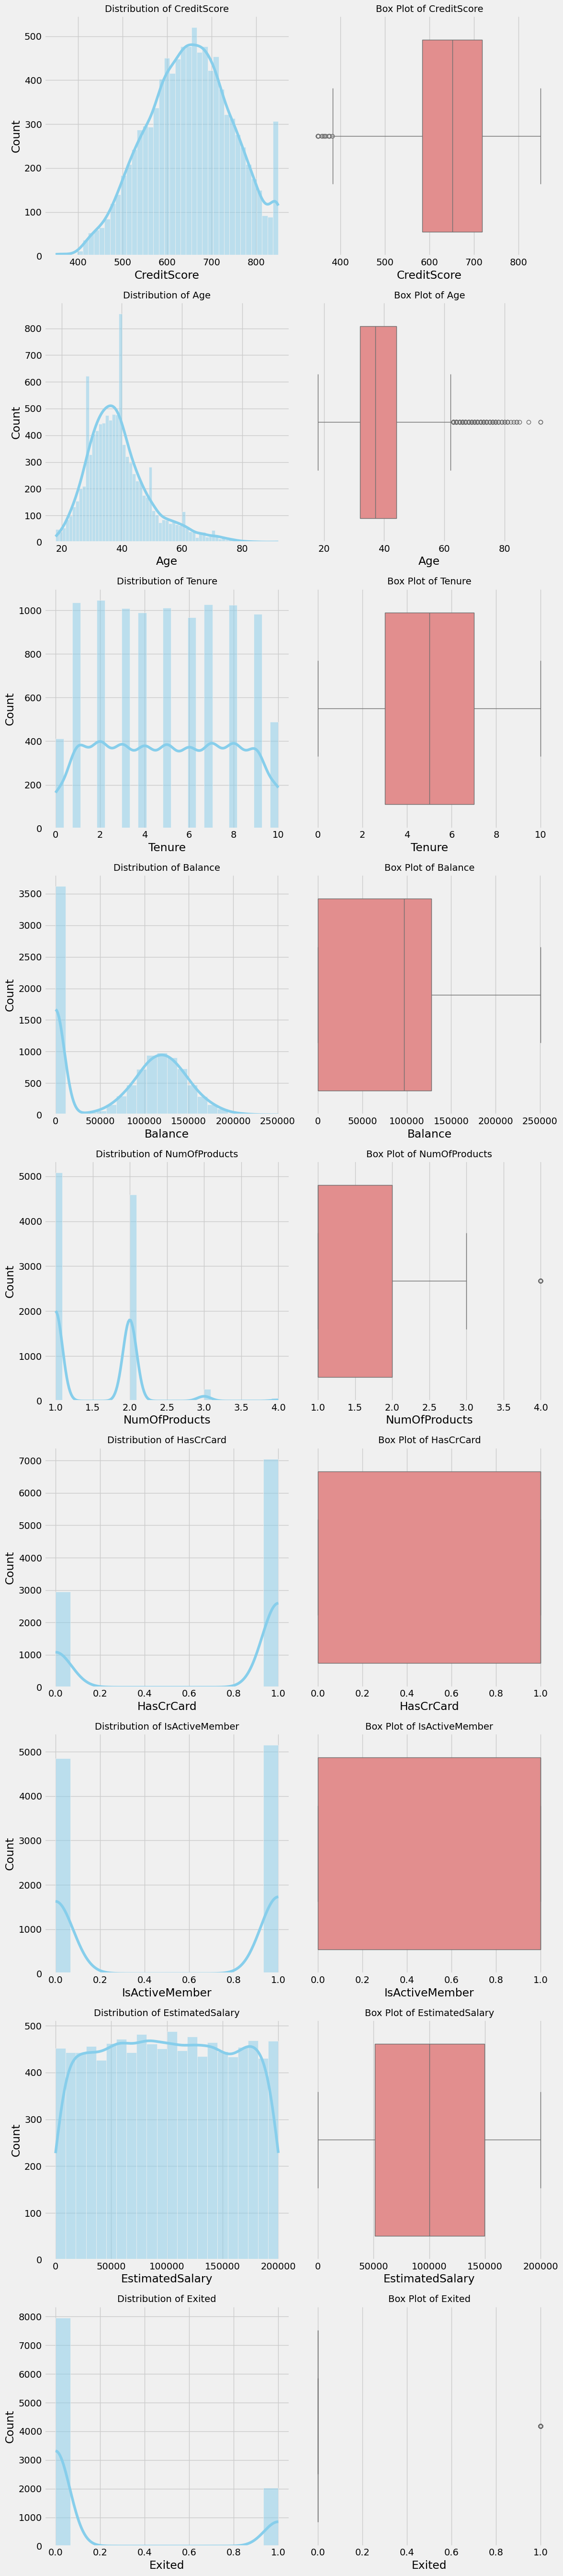

In [14]:
# Set up the Matplotlib figure
plt.figure(figsize=(12, 6 * len(numerical_columns)))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, 2 * i - 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)

    plt.subplot(len(numerical_columns), 2, 2 * i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [15]:
def count_number_of_outliers(data,col):
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IQR = Q3 - Q1
  s=0
  for item in df.loc[:,col]:
      if (item>1.5*IQR+Q3) or (item<Q1-1.5*IQR):
        s+=1
  return s
for col in numerical_columns:
  print(f'{col} has {count_number_of_outliers(df,col)} Outliers')
  print(f'----------------------------------------')
# Age has alot of outliers as shown

CreditScore has 15 Outliers
----------------------------------------
Age has 359 Outliers
----------------------------------------
Tenure has 0 Outliers
----------------------------------------
Balance has 0 Outliers
----------------------------------------
NumOfProducts has 60 Outliers
----------------------------------------
HasCrCard has 0 Outliers
----------------------------------------
IsActiveMember has 0 Outliers
----------------------------------------
EstimatedSalary has 0 Outliers
----------------------------------------
Exited has 2037 Outliers
----------------------------------------


Check for Duplicated Values

In [16]:
df.duplicated().sum()

0

In [17]:
# update for categorical and numerical columns
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(include = np.number).columns
categorical_columns

Index(['Geography', 'Gender'], dtype='object')


From Data Cleaning i conclude that:
1.   There is no nulls
2.   data types are correct
3.   there arenot any duplicated values
4.   'Age' Column has alot of outliers "Skewed to the right"








# EDA

In [18]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


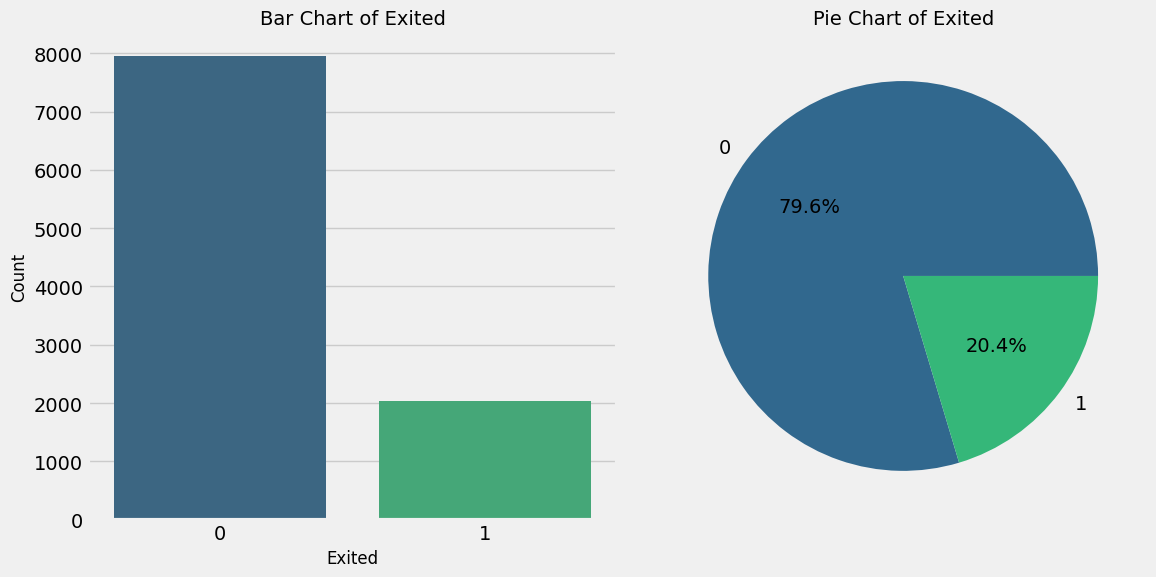

In [19]:
data = df['Exited'].value_counts()

# Set up the Matplotlib figure
plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
sns.barplot(x=data.index, y=data.values, palette='viridis')
plt.title('Bar Chart of Exited', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(data)))
plt.title('Pie Chart of Exited', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


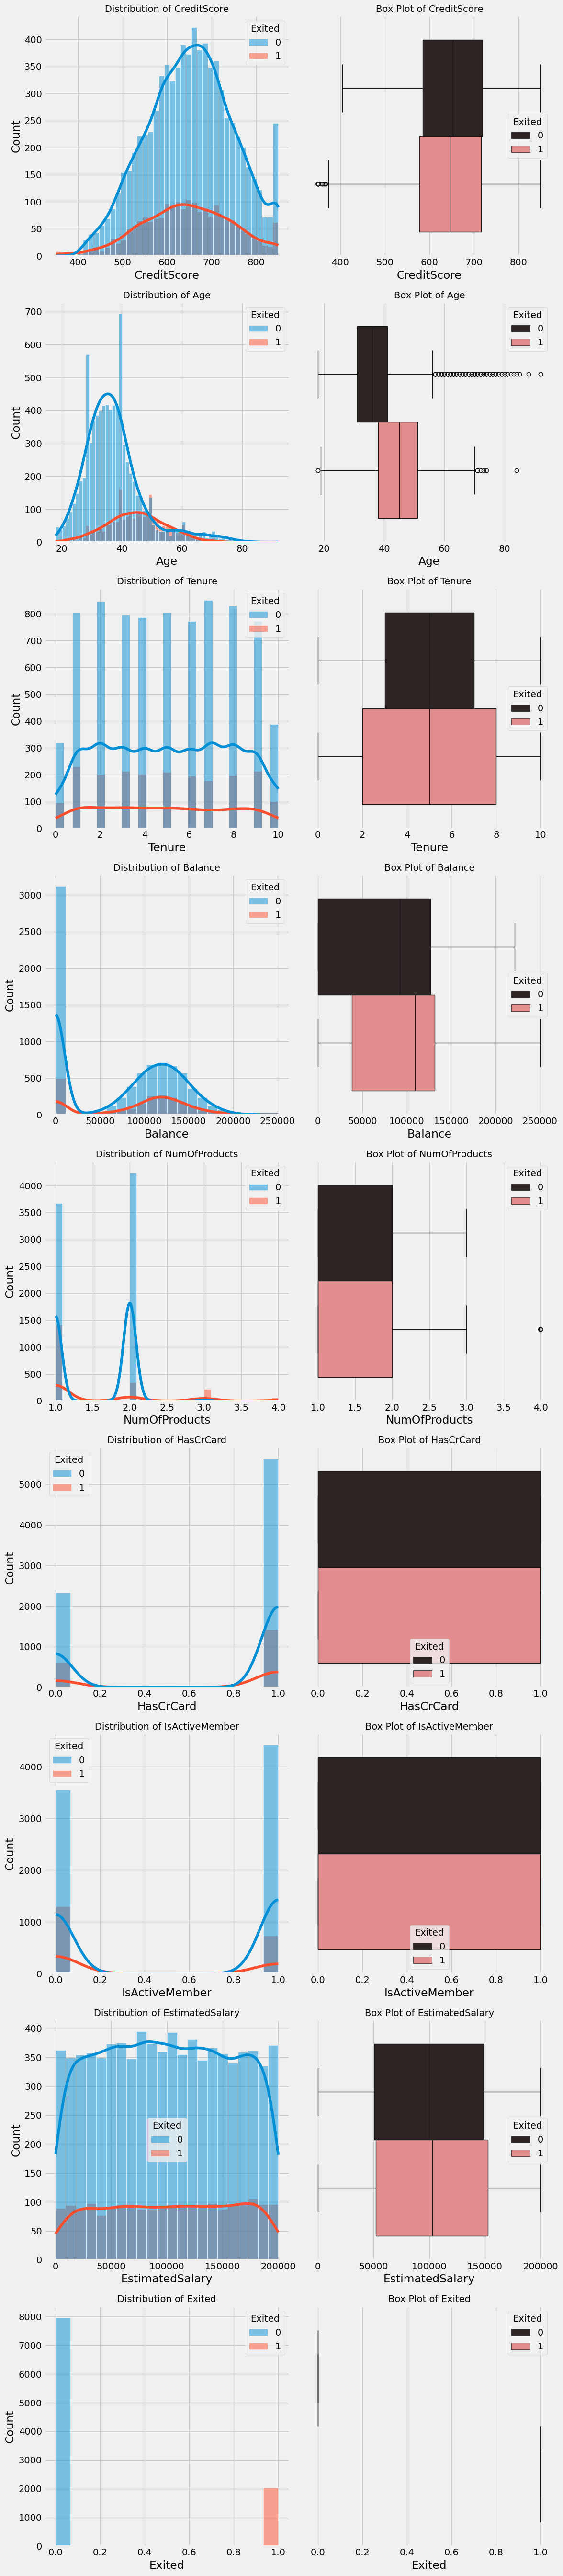

In [20]:
# Set up the Matplotlib figure
plt.figure(figsize=(12, 6 * len(numerical_columns)))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, 2 * i - 1)
    sns.histplot(data=df,x=col, kde=True, color='skyblue',hue='Exited')
    plt.title(f'Distribution of {col}', fontsize=14)

    plt.subplot(len(numerical_columns), 2, 2 * i)
    sns.boxplot(x=df[col], color='lightcoral',hue=df['Exited'])
    plt.title(f'Box Plot of {col}', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

I can conclude the following :

1.   Exited are the most
2.   Credict Score below 400 are exited
3.   Most of lower ages and upper ages are not exited



In [21]:
df[numerical_columns].corr()['Exited']

,Exited
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000


From plots above and corr i can conclude that most of columns hasnot a good corr with Exited

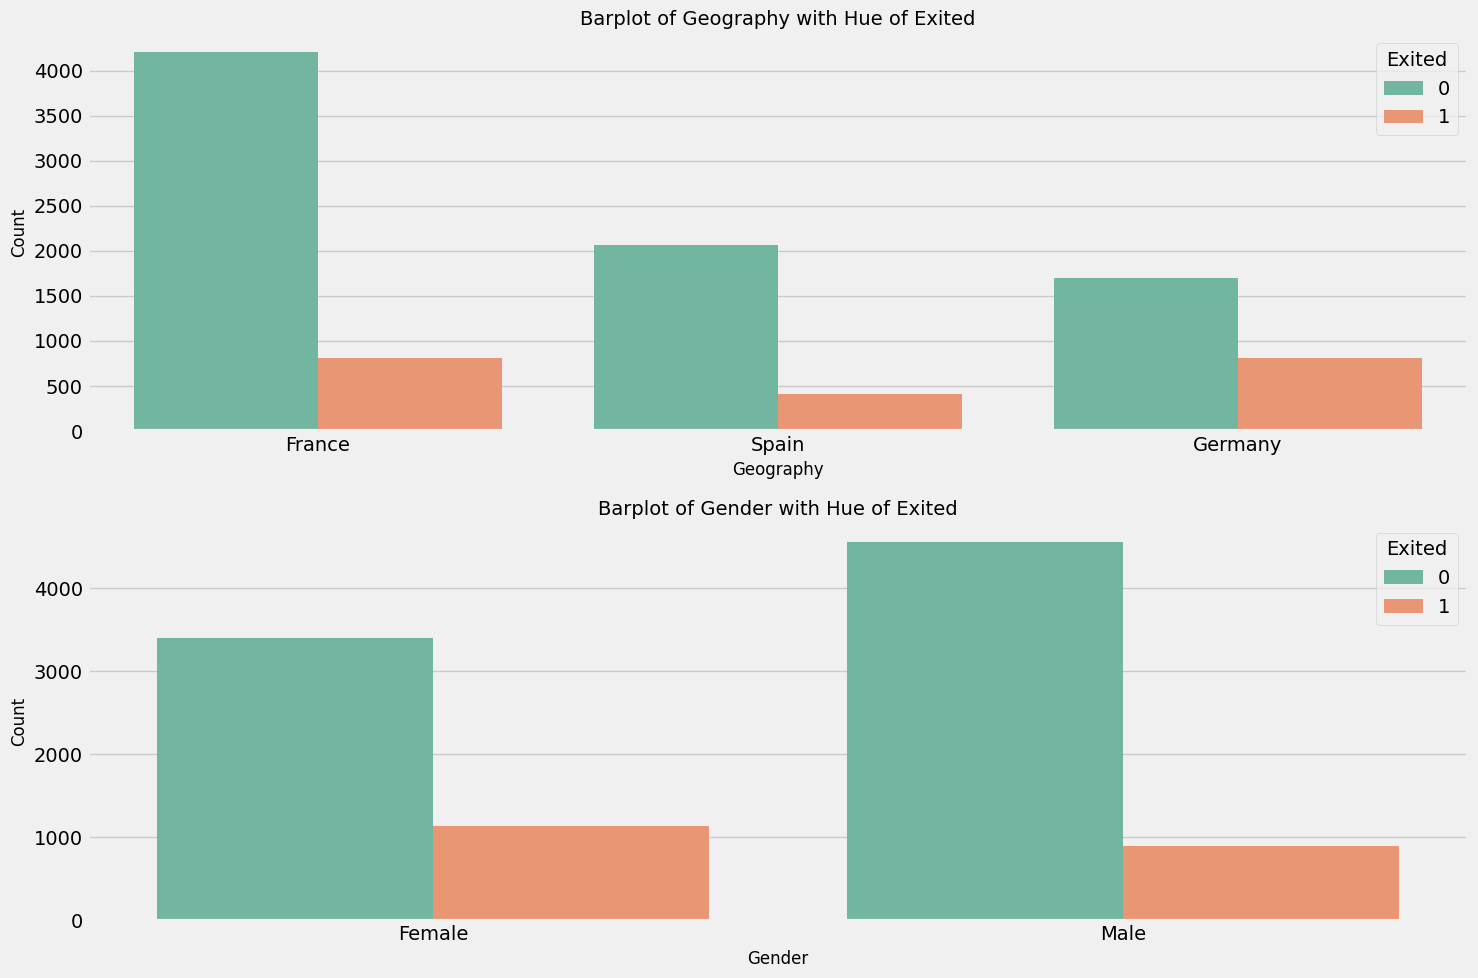

In [22]:
# Set up the Matplotlib figure
plt.figure(figsize=(15, len(categorical_columns) * 5))

# Iterate over each categorical column
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=df, x=col, hue='Exited', palette='Set2')
    plt.title(f'Barplot of {col} with Hue of Exited', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [23]:
df['new1']=df['Gender'].map({'Male':1,'Female':2})
df['new2']=df['Geography'].map({'France':3,'Germany':1,'Spain':2})
df[df.select_dtypes(include=np.number).columns].corr()['Exited']

,Exited
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000
new1,0.106512


In [24]:
df.drop(['new1','new2'],axis=1,inplace=True)

# Data Preprocessing

Encoding for categorical Columns

In [25]:
df=pd.get_dummies(df,columns=list(df.select_dtypes(include='object').columns),drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [26]:
df.replace({True:1,False:0},inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Transformation for Age

In [27]:
df['Age'] = df['Age'].apply(lambda x:np.log(x))
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,3.737670,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,3.713572,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,3.737670,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,3.663562,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,3.761200,2,125510.82,1,1,1,79084.10,0,0,1,0


Scaling

In [28]:
df['CreditScore'] = df['CreditScore'].apply(lambda x: (x - df['CreditScore'].mean()) / df['CreditScore'].std())
df['EstimatedSalary'] = df['EstimatedSalary'].apply(lambda x: (x - df['EstimatedSalary'].mean()) / df['EstimatedSalary'].std())
df['Balance'] = df['Balance'].apply(lambda x: (x - df['Balance'].mean()) / df['Balance'].std())

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326205,3.737670,2,-1.225786,1,1,1,0.021885,1,0,0,0
1,-0.440014,3.713572,1,0.117344,1,0,1,0.216523,0,0,1,0
2,-1.536717,3.737670,8,1.332987,3,1,0,0.240675,1,0,0,0
3,0.501496,3.663562,1,-1.225786,2,0,0,-0.108912,0,0,0,0
4,2.063781,3.761200,2,0.785689,1,1,1,-0.365258,0,0,1,0


In [30]:
col_list = []
for col in df.columns:
  if abs(df[col].corr(df['Exited']))<0.1:
    col_list.append(col)
col_list

['CreditScore',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'EstimatedSalary',
 'Geography_Spain']

In [31]:
df.drop(col_list,axis=1,inplace=True)
df.head()

,Age,Balance,IsActiveMember,Exited,Geography_Germany,Gender_Male
0,3.737670,-1.225786,1,1,0,0
1,3.713572,0.117344,1,0,0,0
2,3.737670,1.332987,0,1,0,0
3,3.663562,-1.225786,0,0,0,0
4,3.761200,0.785689,1,0,0,0


Splitting The data

In [32]:
from sklearn.model_selection import train_test_split
X= df.drop('Exited',axis=1)
y=df['Exited']

# using the train test split function
X_train, X_, y_train, y_ = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.4,
                                   shuffle=True)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,
                                   random_state=104,
                                   test_size=0.5,
                                   shuffle=True)
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape, X_test.shape, y_test.shape

((6000, 5), (6000,), (2000, 5), (2000,), (2000, 5), (2000,))

# ANN

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train,  validation_data = (X_cv, y_cv), epochs = 100)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7107 - loss: 0.6220 - val_accuracy: 0.8180 - val_loss: 0.5024
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8085 - loss: 0.4488 - val_accuracy: 0.8205 - val_loss: 0.4298
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.4250 - val_accuracy: 0.8085 - val_loss: 0.4182
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8184 - loss: 0.4256 - val_accuracy: 0.8230 - val_loss: 0.4022
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8333 - loss: 0.4112 - val_accuracy: 0.8370 - val_loss: 0.3860
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8224 - loss: 0.4274 - val_accuracy: 0.8420 - val_loss: 0.3725
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8250 - loss: 0.4082 - val_accuracy: 0.8360 - val_loss: 0.3921
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.4066 - val_acc

# Loss

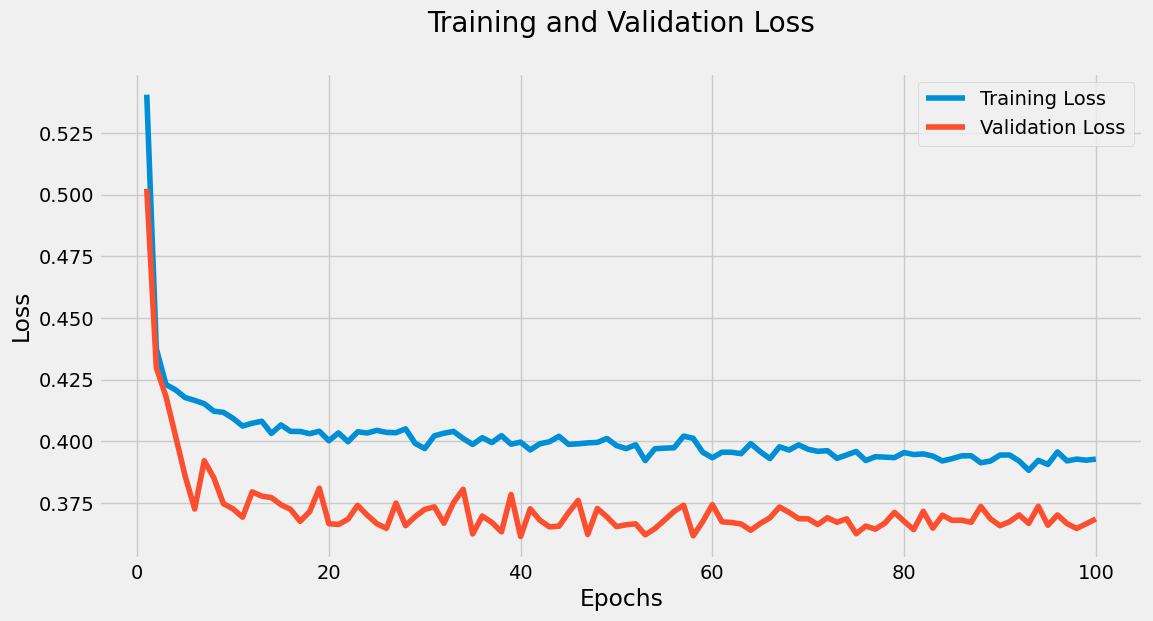

In [39]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 101)
plt.plot(epoch, train_loss, label = 'Training Loss')
plt.plot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy

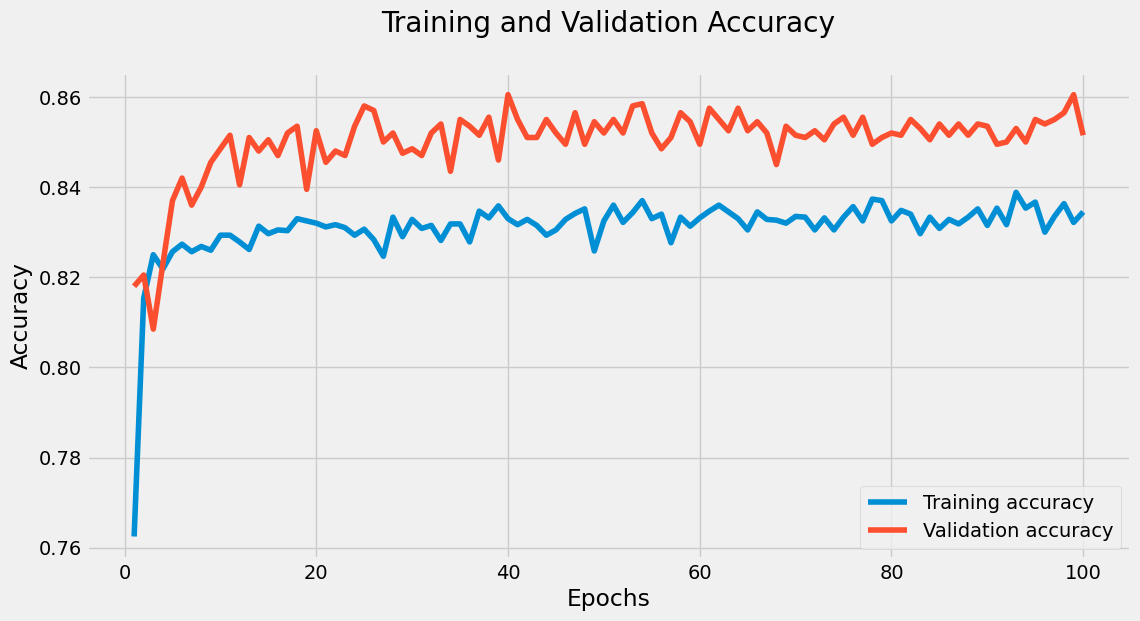

In [41]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epoch = range(1, 101)
plt.plot(epoch, train_loss, label = 'Training accuracy')
plt.plot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8171 - loss: 0.4315
Accuracy of model is 0.8245000243186951


# Plotting The Model

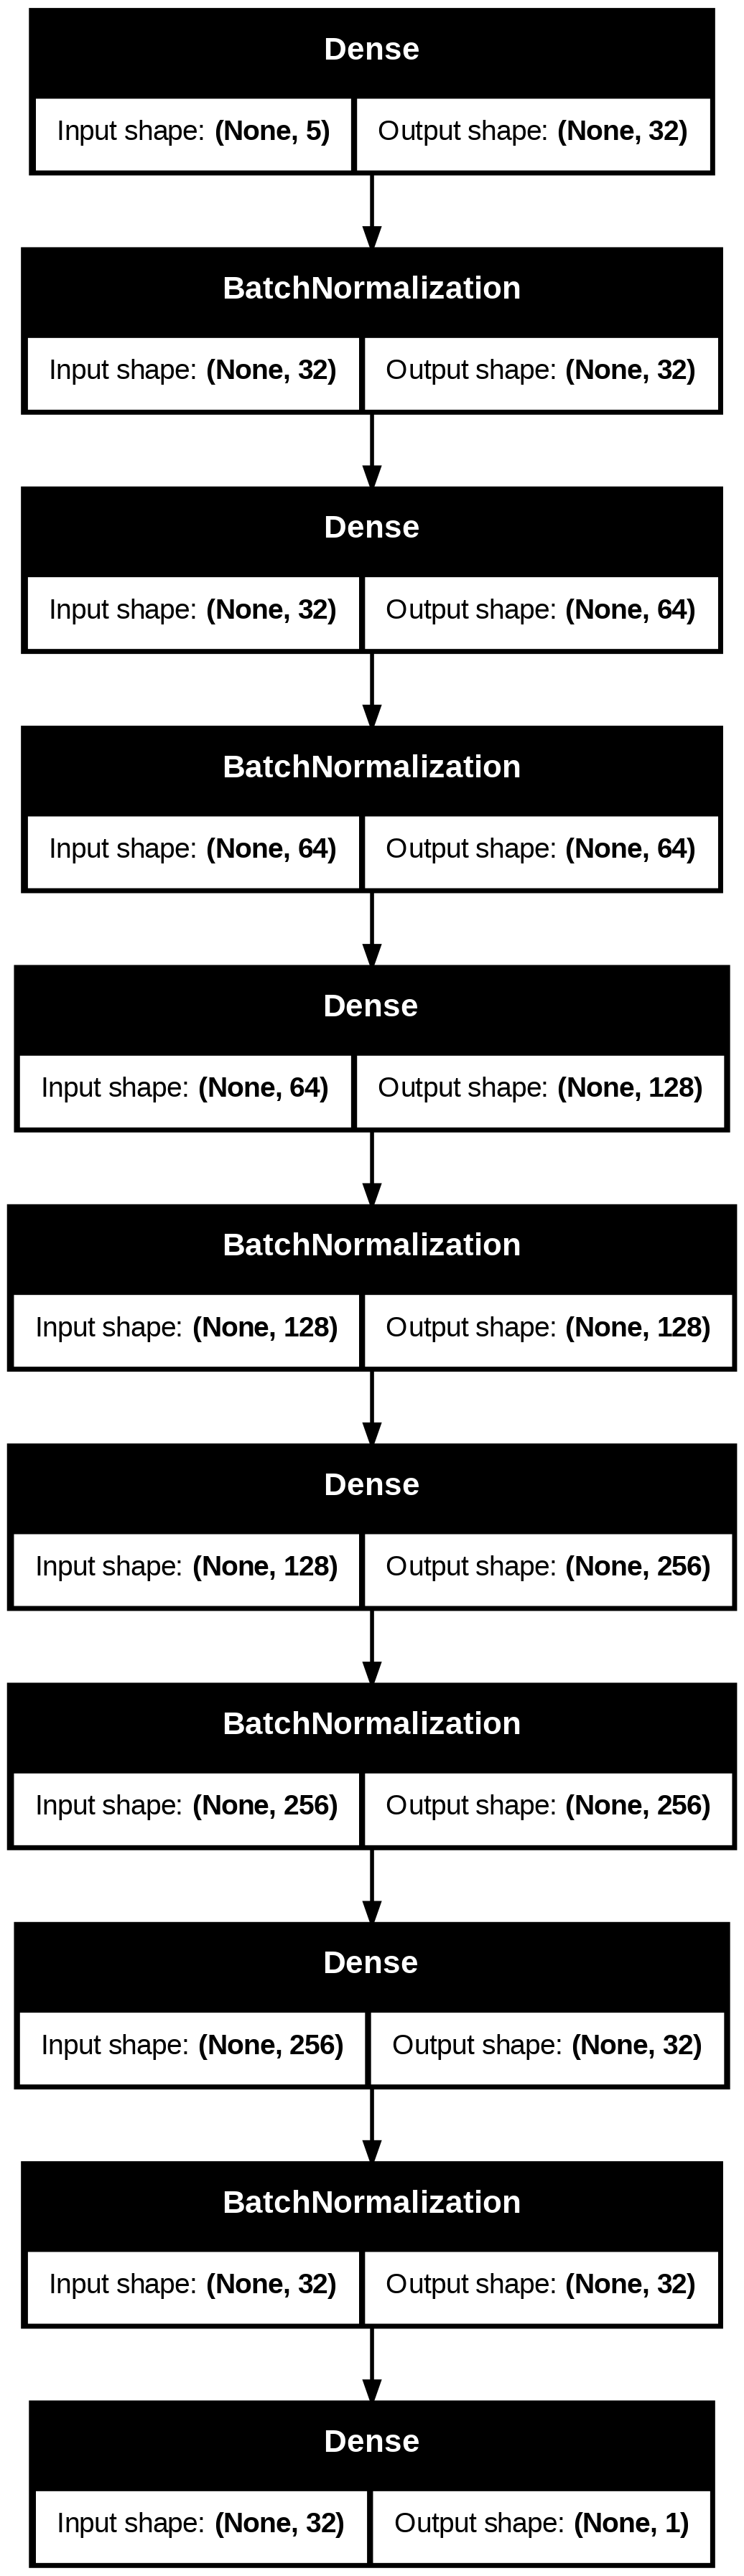

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)